In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


Using cache found in /home/ye/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-2-13 Python-3.8.10 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5930MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 41.1MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


image 1/1: 720x1280 2 persons, 2 ties
Speed: 801.9ms pre-process, 66.8ms inference, 236.9ms NMS per image at shape (1, 3, 384, 640)


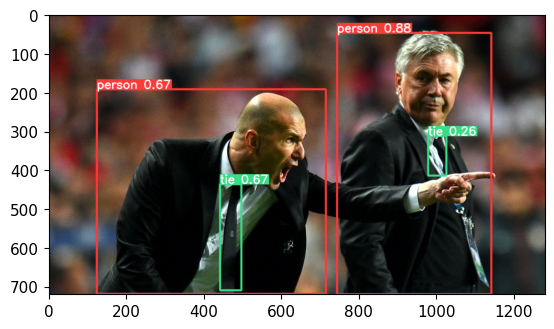

In [2]:
image = ['https://ultralytics.com/images/zidane.jpg']  # or file, Path, PIL, OpenCV, numpy, list
results = model(image)
print(results)  # print img1 predictions (pixels)

%matplotlib inline
plt.imshow(results.render()[0])

In [3]:
results.pandas().xyxy[0]  # img1 predictions (pandas)

,xmin,ymin,xmax,ymax,confidence,class,name
0,743.285400,48.350189,1141.757080,720.000000,0.879827,0,person
1,441.980957,437.314697,496.591431,710.057617,0.674973,27,tie
2,123.105133,193.239166,714.706787,719.741943,0.665426,0,person
3,978.984009,313.574921,1025.302124,415.528900,0.260949,27,tie


## Moving detection

In [4]:
cap = cv2.VideoCapture(-1)

while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [10]:
cap = cv2.VideoCapture('../vision/samples/sample1.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [4]:
import uuid
import os
import time
import cv2

In [7]:
IMAGE_PATH = os.path.join('data', 'images/sample1')
# labels = ['puck', 'player1', 'player2', 'table']
num_imgs = 50

In [8]:
## collect images
cap = cv2.VideoCapture("../vision/samples/sample1.mp4")

# for label in labels:
for img_num in range(num_imgs):
    # print(f'Collecting image {img_num} for {label}')
    
    ret, frame = cap.read()
    img_name = os.path.join(IMAGE_PATH, str(uuid.uuid1())+'.jpg')
    cv2.imwrite(img_name, frame)
    cv2.imshow('frame', frame)
    time.sleep(2)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()